In [ ]:
!pip install joblib

In [ ]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image


Displaying Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving vgsales.csv.zip to vgsales.csv (1).zip


{'vgsales.csv (1).zip': b'PK\x03\x04-\x00\x00\x00\x08\x005\xbc3Oc\x03\xd9H\xff\xff\xff\xff\xff\xff\xff\xff\x0b\x00\x14\x00vgsales.csv\x01\x00\x10\x00\x05\xb0\x14\x00\x00\x00\x00\x00\xee\xf3\x05\x00\x00\x00\x00\x00\x9c\xbd\xc9v\x1c\xc7\x926\xb8\xc7S\xa4jQ\xb7\xeat\x107\xe6\x01;\x10\xe0$\x89"\x8a\xa0H\xa96\xff\t\x02A .\x12\x19\xa8\x1cDAo\xd4\xbb~\x86\xee\x17k\xb3\xcf\xcc\x87\x982Su\xaa.\x07\x88a\xe1\xe1nn\xf6\xd9\xfc\xb1^=\x04\xbf\xd4\x8fMp\xb5\xac\xb7\xdf\xba\xf5c\xf0{S\xaf\x837\xcdjM?\xdb}]\xb6\x9b\xfbf\x1d\xfcr\xfe\x7f\xae\xebe\xb3\t^\xfd\xaa\x7f\xf8\xf1J\xff\xf0aK\xff@\xff\xfcf\xd9}\xad\x97\xf2\x97\x93(\xf8\xd2\xb6\x8b\xeb\xa7n\xbd\xdd\xf0\x1f\x838\x0c\xf3@\xff\xfeK\xbb\xda6\xab\xdb.H\xa3\xd3\xb4\n\xe2\xea4\x8c\x83\xe4\xb4(\x82\xf24\xcd\x832>-\xd2\x938\xb8\xde=5\xeb\xc5\xfbz\xddv\x8b\x97\xebns\x1a\xfc\xf2\xea:\x88\xaa2s\x0b\xb6\xa4\x98HID\xb22\xc8O\xcb(\x08\x99\\\x1a\x9e\xc6\xe9I\x12\x08\x8d\x9f\xea\xf5v\xc1k\xd1\xf5\x94\xc1\xc7\xfa\xa6]\xdd9"QvJ\xc4\xa3\xf8\xb4dREE\xbf$Q\x90\xd0O\xe

In [ ]:
# Get the filename
filename = next(iter(uploaded))

# Read CSV
df = pd.read_csv(filename)

# Optional: Preview the data
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

df.desribe() returning info about each column in this dataset

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

Importing Music.csv

In [ ]:
from google.colab import files
data2= files.upload()


Saving music.csv to music (1).csv


In [ ]:
# Get the filename
music = next(iter(data2))

# Read CSV
music_data = pd.read_csv(music)

# Preview the data
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


Cleaning data

Input = Music data without genre for

In [ ]:
x = music_data.drop(columns=['genre'])
x.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


Output = Music data genre

In [ ]:
y = music_data['genre']
y.head()

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

Building Model Using ML Algo: Decision Tree

In [ ]:
 model = DecisionTreeClassifier()
 model.fit(x_train,y_train)

DecisionTreeClassifier()

Predictions

In [ ]:
pred = model.predict([[21,1],[22,0],[27,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred

array(['HipHop', 'Dance', 'Jazz'], dtype=object)

Calculating Accuracy

In [ ]:
predictions = model.predict(x_test)

In [ ]:
score = accuracy_score(y_test, predictions)
score

1.0

saving trained model

In [ ]:
joblib.dump(model, 'music-recommender.joblib')

['music-recommender.joblib']

loading model

In [ ]:
model1 = joblib.load('music-recommender.joblib')

predicting on saved model

In [ ]:
pred = model1.predict([[21,1],[22,0],[27,1],[36,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred

array(['HipHop', 'Dance', 'Jazz', 'Classical'], dtype=object)

Visulaizing Decision Tree

In [ ]:
tree.export_graphviz(model, out_file='music-recommender.dot',
                    feature_names=['age','gender'],
                     class_names= sorted(y.unique()),
                     label ='all',
                     rounded = True,
                     filled = True)

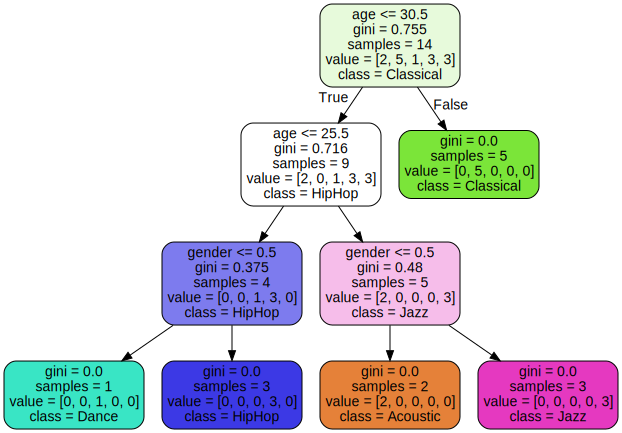

In [ ]:
with open('music-recommender.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)